## Demonstration with Blood Transfusion Data

### Data Preparation

In [7]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data', header=None)

In [11]:
_x = df.loc[1:, 0:3].values.astype(int)
y = df.loc[1:, 4].values.astype(int)

# Normalize x
x = (_x - np.mean(_x, axis=0))/np.std(_x, axis=0)

# Peek the data
_x.shape, y.shape, _x[:1], x[:1], y[:30]

((748, 4),
 (748,),
 array([[    2,    50, 12500,    98]]),
 array([[-0.92789873,  7.62334626,  7.62334626,  2.61563344]]),
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0]))

In [12]:
# Divide the data
# Training 70%, Test 30%
n = int(0.7 * x.shape[0])
x_train, y_train = x[:n], y[:n]
x_test, y_test = x[n:], y[n:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((523, 4), (523,), (225, 4), (225,))

### Logistic Regression at Play

In [13]:
from log_regression import LogisticRegression

In [15]:
# Training with alpha = 0.001
classifier = LogisticRegression(alpha=0.001)
classifier.fit(x_train, y_train, 10000)
acc, conf = classifier.evaluate(x_train, y_train, verbose=True)

Accuracy: 0.759082217973
Confusion matrix: 
 [[ 374.   14.]
 [ 112.   23.]]


In [17]:
# See the score for test data
acc, conf = classifier.evaluate(x_test, y_test, verbose=True)

Accuracy: 0.804444444444
Confusion matrix: 
 [[ 181.    1.]
 [  43.    0.]]


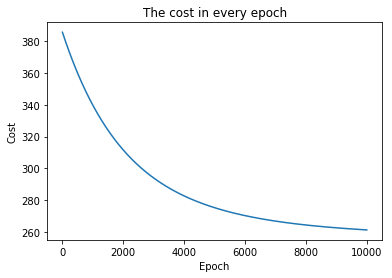

In [27]:
# See the cost log graph
import matplotlib.pyplot as plt 

x = np.arange(len(classifier.cost_log)) + 1
plt.plot(x, classifier.cost_log)
plt.title('The cost in every epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()